In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


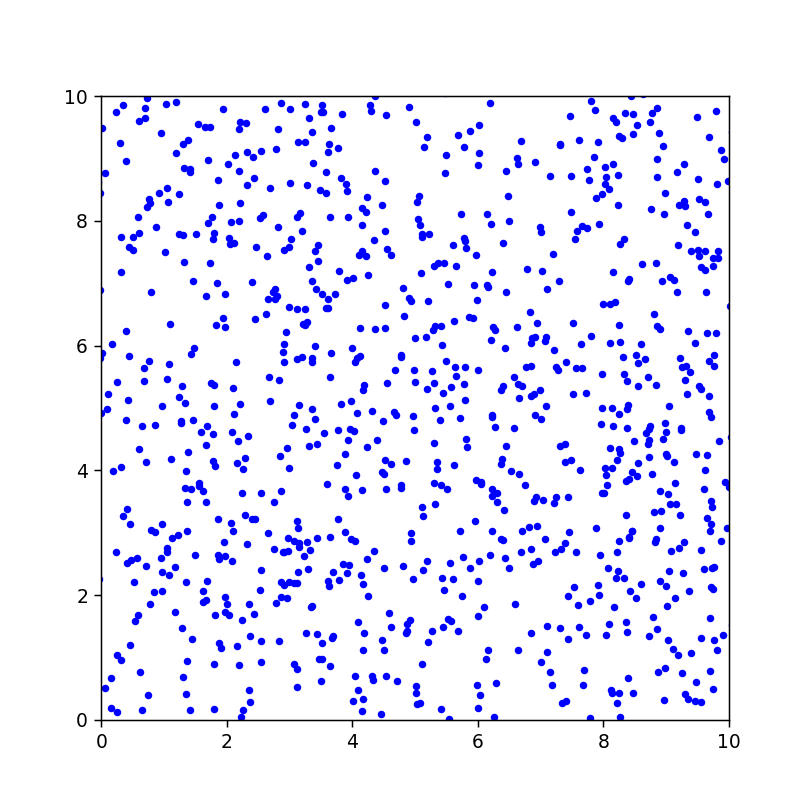

<IPython.core.display.Javascript object>


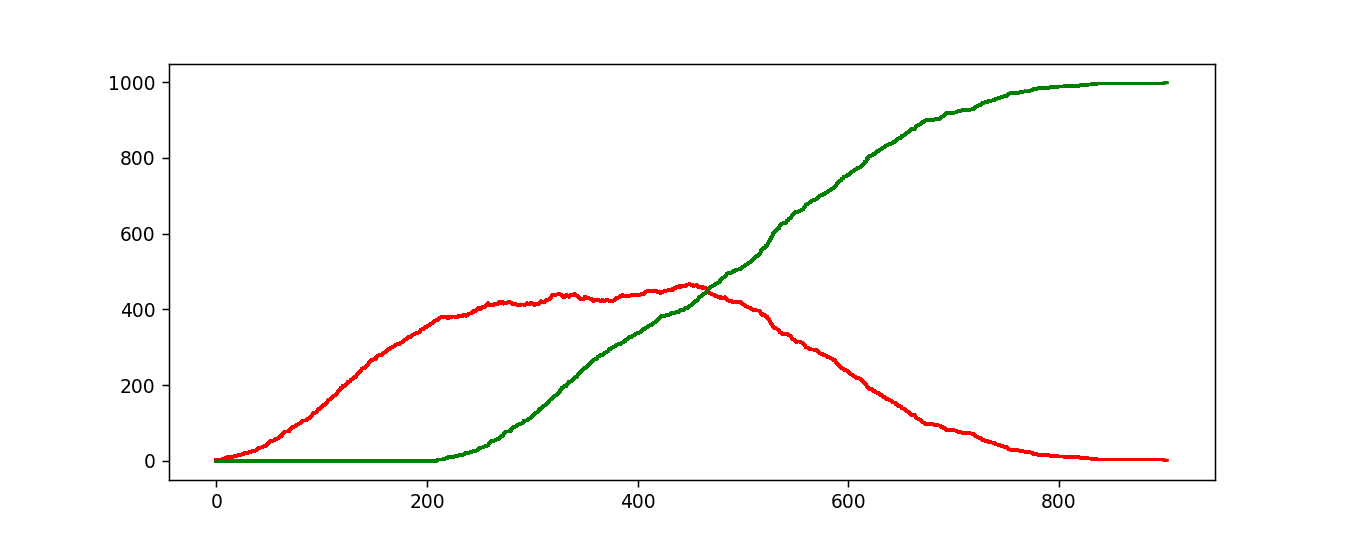

In [13]:
# Input Parameters
population = 1000
first_sick_person = [1, 2, 3]
no_days = 600
model_dimension = 10 # for example in m
movement = 0.2 # distance, for example in m
movement_per_day = 10
recovery_duration = 21 # in days
infection_radius = 0.05 # distance, for example in m


# Calculation

total_time_steps = no_days * movement_per_day
recovery_time_steps = recovery_duration * movement_per_day

fig,ax = plt.subplots(1, 1, figsize=(6, 6))  
fig2,ax2 = plt.subplots(1, 1, figsize=(10, 4))  

def pltsin(ax, pos, status):
    ax.set_xlim(0, model_dimension)
    ax.set_ylim(0, model_dimension)
    pos_healthy = pos[(status==0) | (status>recovery_time_steps)].copy()
    pos_sick = pos[(status>0) & (status<=recovery_time_steps)].copy()
    ax.plot(pos_healthy[:, 0], pos_healthy[:, 1], 'b.')
    ax.plot(pos_sick[:, 0], pos_sick[:, 1], 'r.')
    fig.canvas.draw()

pos = np.random.uniform(low=0, high=model_dimension, size=(population, 2))
status = np.zeros(shape=(population,))
status[first_sick_person] = 1
get_sick = np.zeros(shape=(population,)) # if 0, not sick. If 1, got sick

results = np.zeros(shape=(total_time_steps, 4))
    
for i in range(total_time_steps):
    ax.clear()
    no_healthy_people = sum(status==0)
    no_sick_people = sum((status>0) & (status<=recovery_time_steps))
    no_recovered_people = sum(status>recovery_time_steps)
    results[i, 0] = i # Day number
    results[i, 1] = no_healthy_people # Number of healthy people
    results[i, 2] = no_sick_people # Number of sick people
    results[i, 3] = no_recovered_people # Number of recovered/immune people
    mov = np.random.normal(loc=0.0, scale=movement, size=(population, 2))
    new_pos = pos + mov

    for j in range(status.shape[0]):
        s = status[j]
        if s >= 1:
            diff = new_pos-new_pos[j]
            dist = np.sqrt(diff[:, 0]**2+diff[:, 1]**2)
            get_sick[dist <= infection_radius] = 1
            
    status += get_sick
    pltsin(ax, new_pos, status)
    if i%10 == 0:
        fig.savefig('figs/{}.jpg'.format(i))
    
    ax2.plot(results[:i,0], results[:i, 2], 'r-')
    ax2.plot(results[:i,0], results[:i, 3], 'g-')
    fig2.canvas.draw()

    if no_sick_people == 0:
        break
    #time.sleep(0.01)
   

<IPython.core.display.Javascript object>


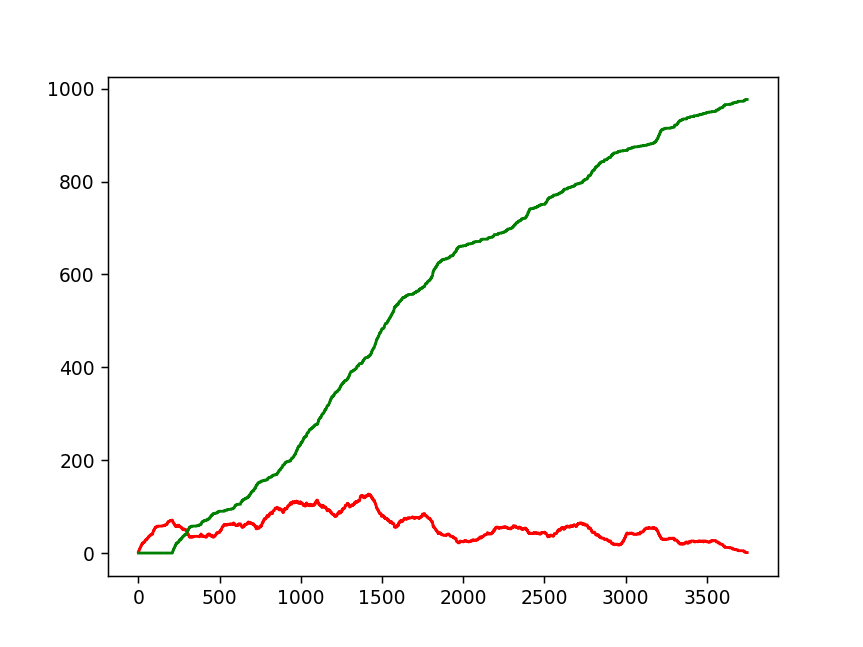

In [151]:
plt.figure()
#plt.plot(results[:i,0], results[:i, 1], 'b-')
plt.plot(results[:i,0], results[:i, 2], 'r-')
plt.plot(results[:i,0], results[:i, 3], 'g-')
plt.show()